In [1]:
%matplotlib inline

#import 須要用到的 module
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#載入train資料train.csv
train = pd.read_csv('train.csv')
#觀察前幾筆資料
train.head()

,id,花萼長度,花萼寬度,花瓣長度,花瓣寬度,屬種,type
0,1,5.4,3.7,1.5,0.2,Iris-setosa,1
1,2,4.8,3.4,1.6,0.2,Iris-setosa,1
2,3,4.8,3.0,1.4,0.1,Iris-setosa,1
3,4,4.3,3.0,1.1,0.1,Iris-setosa,1
4,5,5.8,4.0,1.2,0.2,Iris-setosa,1


In [3]:
#查看train資料數
train.shape

(123, 7)

In [4]:
#將項目名稱改為英文以避免衝突
train = train.rename(columns = {'花萼長度':'sepalLength','花萼寬度':'sepalWidth',
                             '花瓣長度':'petalLength','花瓣寬度':'petalWidth',
                             '屬種':'class'})

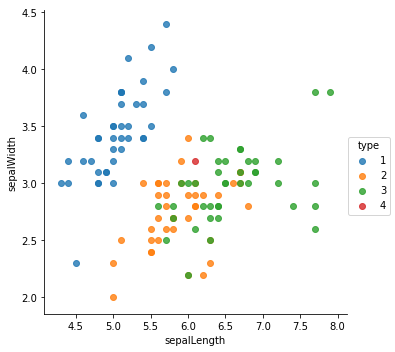

In [5]:
#觀察花萼長、寬分布
sns.lmplot('sepalLength','sepalWidth',data=train,fit_reg=False,hue='type')

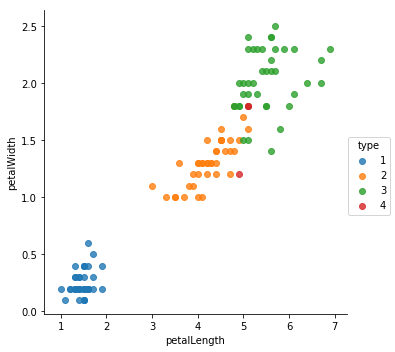

In [6]:
#觀察花瓣長、寬分布
sns.lmplot('petalLength','petalWidth',data=train,fit_reg=False,hue='type')

In [7]:
#將缺漏的資料補上0
train.fillna(0, inplace = True)

In [8]:
#將pandas的dataframe轉為numpy的ndarray，並只取花瓣、花萼長寬
train_data = train.values[:, 1:5]
train_target = train['type']
#印出檢查
print(train_data)
print(train_target)

[[5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.0 1.4 0.1]
 [4.3 3.0 1.1 0.1]
 [5.8 4.0 1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.0 0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.0 3.0 1.6 0.2]
 [5.0 3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.0 3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.0 1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.0 3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.0 3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.0 1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.0 3.3 1.4 0.2]
 [5.0 2.0 3.5 1.0]
 [5.9 3.0 4.2 1.5]
 [6.0 2.2 4.0 1.0]
 [6.1 2.9 4.7 1.4]
 [5.6 2.9 3.6 1.3]
 [6.7 3.1 4.4 1.4]
 [5.6 3.0 4.5 1.5]
 [5.8 2.7 4.1 1.0]
 [6.2 2.2 4.5 1.5]
 [5.6 2.5 3.9 1.1]
 [5.9 3.2 4.8 1.8]
 [6.1 2.8 4.0 1.3]
 [6.3 2.5 4.

In [9]:
#將資料分為training data及testing data，testing data佔30%
x_train, x_test, y_train, y_test = train_test_split(train_data, train_target, test_size=0.3) 

參考scikit-learn 的algorithm cheat-sheet來選擇適合模型

1.資料大於50筆

2.預測多類別分類

3.資料皆已label

4.樣本資料小於100K筆

5.選擇Linear SVC

6.不是文字資料

7.選擇KNeighborsClassifier

以下分別用Linear SVC及KNeighborsClassifier進行訓練:

In [10]:
lin_clf = LinearSVC()
lin_clf.fit(x_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [11]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [12]:
#用x_test來預測結果
print(lin_clf.predict(x_test))

[2 1 1 1 1 1 3 3 1 2 1 1 1 3 2 3 2 2 2 3 3 1 3 3 1 1 1 3 3 3 3 2 3 3 2 3 3]


In [13]:
#印出預測準確率
print(lin_clf.score(x_test, y_test))

0.8648648648648649


In [14]:
#用x_test來預測結果
print(knn.predict(x_test))

[3 1 1 1 1 1 3 2 1 2 1 1 1 3 2 3 2 2 2 3 3 1 3 3 1 1 1 3 2 3 3 2 3 3 2 3 2]


In [15]:
#印出預測準確率
print(knn.score(x_test, y_test))

0.918918918918919


比較後KNeighborsClassifier 的正確率表現比Linear SVC好

In [16]:
#載入test.csv
test_data = pd.read_csv('test.csv')
#將缺漏的資料補上0
test_data.fillna(0, inplace = True)
#將pandas的dataframe轉為numpy的ndarray，並只取花瓣、花萼長寬
test_data_v = test_data.values[:, 1:5]

In [17]:
#印出資料檢查
print(test_data)

    id  花萼長度  花萼寬度  花瓣長度  花瓣寬度
0    1   5.1   3.5   1.4   0.2
1    2   4.9   3.0   1.4   0.2
2    3   4.7   3.2   1.3   0.2
3    4   4.6   3.1   1.5   0.2
4    5   5.0   3.6   1.4   0.2
5    6   5.4   3.9   1.7   0.4
6    7   4.6   3.4   1.4   0.3
7    8   5.0   3.4   1.5   0.2
8    9   4.4   2.9   1.4   0.2
9   10   4.9   3.1   1.5   0.1
10  11   7.0   3.2   4.7   1.4
11  12   6.4   3.2   4.5   1.5
12  13   6.9   3.1   4.9   1.5
13  14   5.5   2.3   4.0   1.3
14  15   6.5   2.8   4.6   1.5
15  16   5.7   2.8   4.5   1.3
16  17   6.3   3.3   4.7   1.6
17  18   4.9   2.4   3.3   1.0
18  19   6.6   2.9   4.6   1.3
19  20   5.2   2.7   3.9   1.4
20  21   6.3   3.3   6.0   2.5
21  22   5.8   2.7   5.1   1.9
22  23   7.1   3.0   5.9   2.1
23  24   6.3   2.9   5.6   1.8
24  25   6.5   3.0   5.8   2.2
25  26   7.6   3.0   6.6   2.1
26  27   4.9   2.5   4.5   1.7
27  28   7.3   2.9   6.3   1.8
28  29   6.7   2.5   5.8   1.8
29  30   7.2   3.6   6.1   2.5


In [18]:
#使用KNeighborsClassifier來進行預測
predict = knn.predict(test_data_v)

In [19]:
# 存入預測結果dataframe
data = {'id':test_data['id'],'type':predict}
predicted_dataframe = pd.DataFrame(data=data)

In [20]:
#印出前五項檢查
predicted_dataframe.head()

,id,type
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1


In [21]:
#將dataframe存入csv
predicted_dataframe.to_csv('Submission.csv', index=False)